In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # For plots

In [2]:
data = pd.read_csv(r'C:\Users\V0V01S7\Desktop\newdf2.csv')

In [17]:
df = df.set_index('TIMELINE')
df.head()

,ACTV_DUR_MIN_QTY
TIMELINE,
2021-10-10 12:00:00,255.88
2021-10-10 13:00:00,0.00
2021-10-10 14:00:00,0.00
2021-10-10 15:00:00,0.00
2021-10-10 16:00:00,0.00


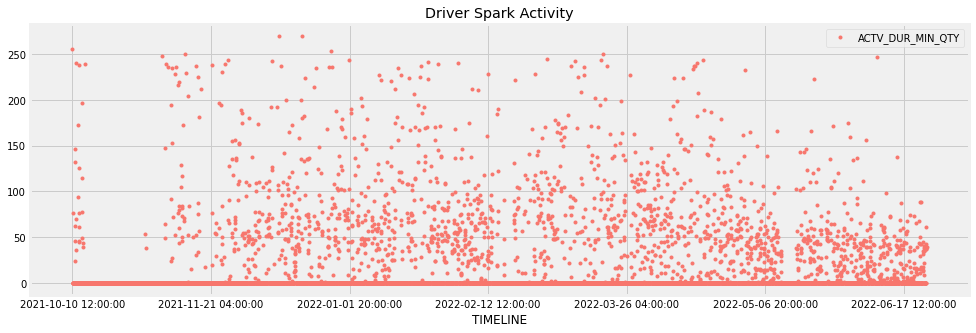

In [18]:
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
df.plot(style='.', figsize=(15,5), color=color_pal[0], title='Driver Spark Activity')
plt.show()

In [32]:
df.index = pd.to_datetime(df.index)

In [34]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(df, label='ACTV_DUR_MIN_QTY')

features_and_target = pd.concat([X, y], axis=1)

C:\Users\V0V01S7\AppData\Local\Temp\ipykernel_3288\2241295984.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


In [36]:
features_and_target.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,ACTV_DUR_MIN_QTY
TIMELINE,,,,,,,,,
2021-10-10 12:00:00,12,6,4,10,2021,283,10,40,255.88
2021-10-10 13:00:00,13,6,4,10,2021,283,10,40,0.00
2021-10-10 14:00:00,14,6,4,10,2021,283,10,40,0.00
2021-10-10 15:00:00,15,6,4,10,2021,283,10,40,0.00
2021-10-10 16:00:00,16,6,4,10,2021,283,10,40,0.00


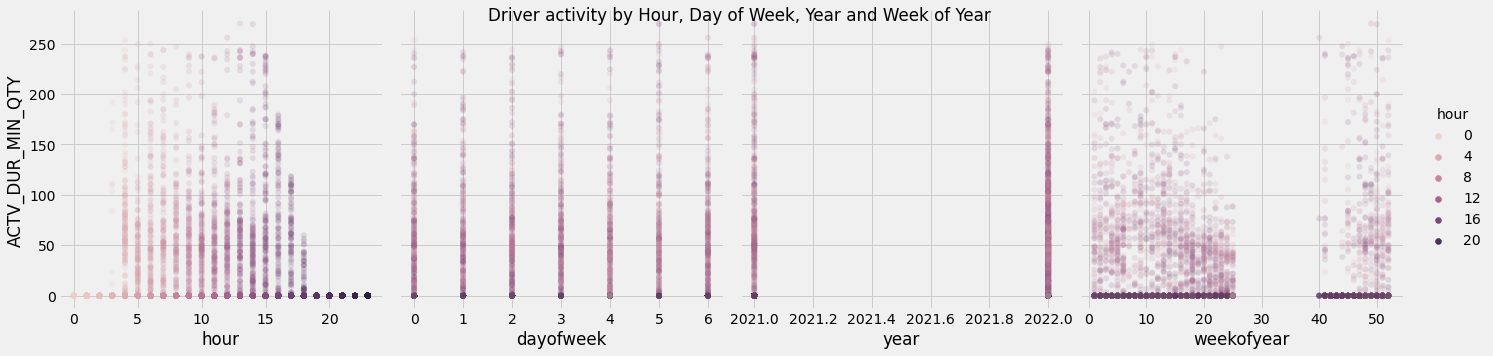

In [46]:
g = sns.pairplot(features_and_target,
             hue='hour',
             x_vars=['hour','dayofweek',
                     'year','weekofyear'],
             y_vars='ACTV_DUR_MIN_QTY',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )

plt.suptitle('Driver activity by Hour, Day of Week, Year and Week of Year')
plt.show()

In [43]:
from prophet import Prophet

In [47]:
data2 = pd.read_csv(r'C:\Users\V0V01S7\Downloads\maherabo42@gmail.com.csv')

In [49]:
data2 = data2.set_index('ACTV_START_TS')

In [50]:
data2.head()

,ACTV_DUR_MIN_QTY
ACTV_START_TS,
2022-05-01T06:36:08.567000,127.38
2022-05-01T12:15:39.972000,1.13
2022-05-01T12:16:47.924000,22.48
2022-05-01T14:17:06.361000,142.78
2022-05-01T08:43:31.069000,69.08


In [51]:
data2.index = pd.to_datetime(data2.index)

In [52]:
X2, y2 = create_features(data2, label='ACTV_DUR_MIN_QTY')

features_and_target2 = pd.concat([X2, y2], axis=1)

C:\Users\V0V01S7\AppData\Local\Temp\ipykernel_3288\2241295984.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


In [53]:
features_and_target2

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,ACTV_DUR_MIN_QTY
ACTV_START_TS,,,,,,,,,
2022-05-01 06:36:08.567,6,6,2,5,2022,121,1,17,127.38
2022-05-01 12:15:39.972,12,6,2,5,2022,121,1,17,1.13
2022-05-01 12:16:47.924,12,6,2,5,2022,121,1,17,22.48
2022-05-01 14:17:06.361,14,6,2,5,2022,121,1,17,142.78
2022-05-01 08:43:31.069,8,6,2,5,2022,121,1,17,69.08
...,...,...,...,...,...,...,...,...,...
2022-04-12 10:03:38.656,10,1,2,4,2022,102,12,15,77.17
2022-04-12 06:50:34.819,6,1,2,4,2022,102,12,15,73.20
2022-04-12 03:52:24.625,3,1,2,4,2022,102,12,15,10.28


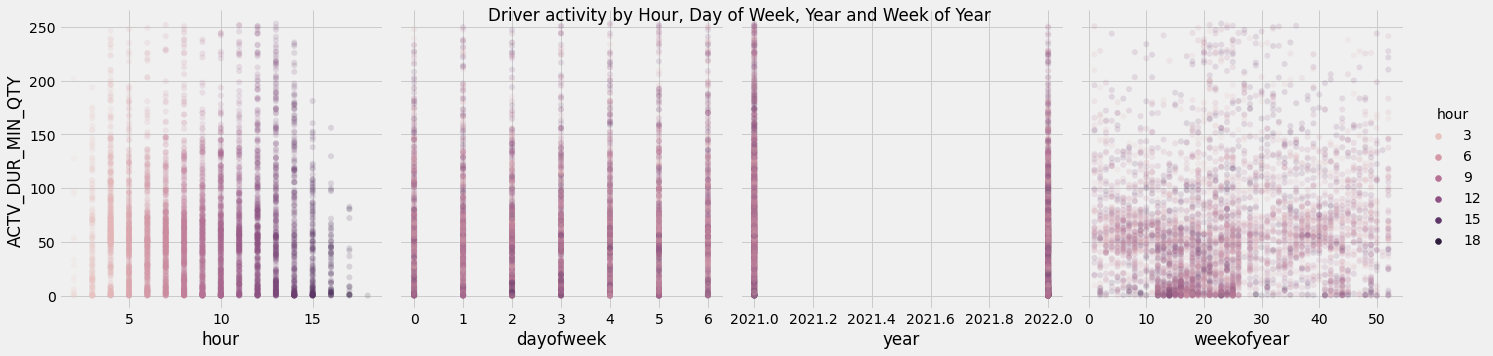

In [54]:
g2 = sns.pairplot(features_and_target2,
             hue='hour',
             x_vars=['hour','dayofweek',
                     'year','weekofyear'],
             y_vars='ACTV_DUR_MIN_QTY',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )

plt.suptitle('Driver activity by Hour, Day of Week, Year and Week of Year')
plt.show()

In [58]:
split_date = '01-Feb-2022'
df_train = data2.loc[data2.index <= split_date].copy()
df_test = data2.loc[data2.index > split_date].copy()

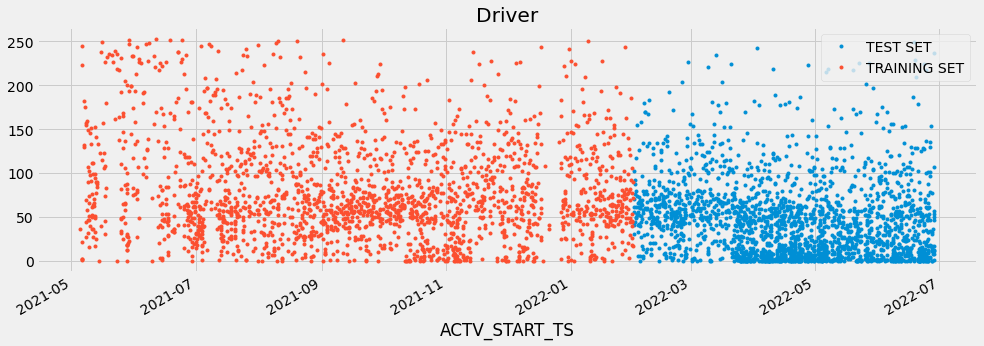

In [59]:
# Plot train and test so you can see where we have split
df_test \
    .rename(columns={'ACTV_DUR_MIN_QTY': 'TEST SET'}) \
    .join(df_train.rename(columns={'ACTV_DUR_MIN_QTY': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(15,5), title='Driver', style='.')
plt.show()

In [60]:
# Format data for prophet model using ds and y
df_train.reset_index() \
    .rename(columns={'ACTV_START_TS':'ds',
                     'ACTV_DUR_MIN_QTY':'y'}).head()

,ds,y
0,2021-05-16 04:26:01.642,114.67
1,2021-05-16 10:53:23.794,156.60
2,2021-05-16 06:20:41.788,249.30
3,2021-05-17 04:05:21.419,105.78
4,2021-05-17 12:13:28.539,226.52


In [61]:
# Setup and train model and fit
model = Prophet()
model.fit(df_train.reset_index() \
              .rename(columns={'ACTV_START_TS':'ds',
                               'ACTV_DUR_MIN_QTY':'y'}))

INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


In [62]:
# Predict on training set with model
df_test_fcst = model.predict(df=df_test.reset_index() \
                                   .rename(columns={'ACTV_START_TS':'ds'}))

In [63]:
df_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-02-01 03:58:23.467,53.850131,12.677394,149.110609,53.850131,53.850131,27.489312,27.489312,27.489312,29.415298,29.415298,29.415298,-1.925986,-1.925986,-1.925986,0.0,0.0,0.0,81.339443
1,2022-02-01 05:09:31.368,53.855489,10.161286,147.380268,53.855489,53.855489,25.035769,25.035769,25.035769,27.189727,27.189727,27.189727,-2.153958,-2.153958,-2.153958,0.0,0.0,0.0,78.891258
2,2022-02-01 06:04:49.930,53.859656,2.717624,135.881892,53.859656,53.859656,16.405244,16.405244,16.405244,18.739225,18.739225,18.739225,-2.333981,-2.333981,-2.333981,0.0,0.0,0.0,70.264900
3,2022-02-01 06:45:16.372,53.862702,-3.202908,137.374863,53.862702,53.862702,13.764133,13.764133,13.764133,16.230801,16.230801,16.230801,-2.466668,-2.466668,-2.466668,0.0,0.0,0.0,67.626835
4,2022-02-01 08:28:14.454,53.870458,3.785871,140.157641,53.870458,53.870458,18.938000,18.938000,18.938000,21.744436,21.744436,21.744436,-2.806436,-2.806436,-2.806436,0.0,0.0,0.0,72.808458


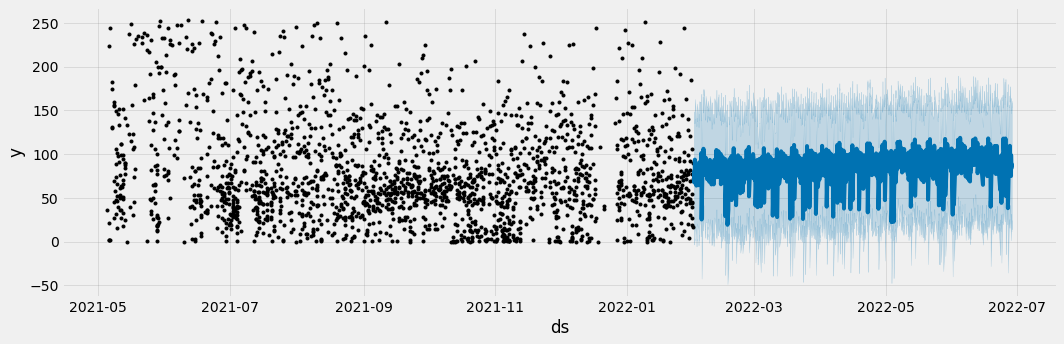

In [64]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(df_test_fcst,
                 ax=ax)
plt.show()

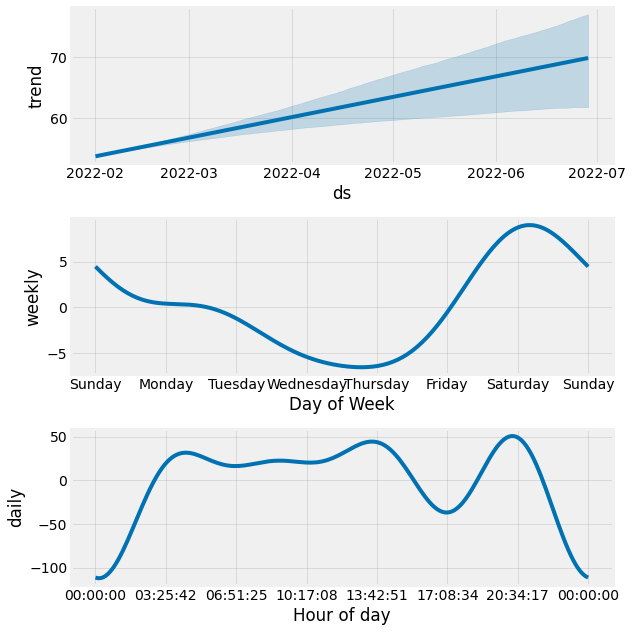

In [65]:
# Plot the components of the model
fig = model.plot_components(df_test_fcst)

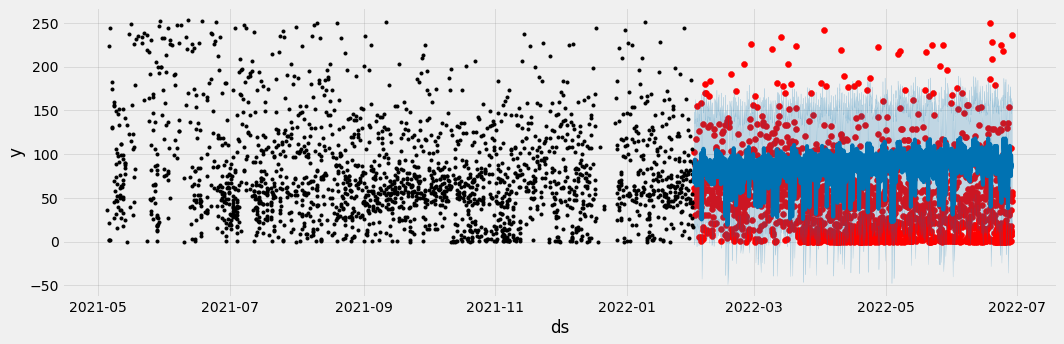

In [67]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(df_test.index, df_test['ACTV_DUR_MIN_QTY'], color='r')
fig = model.plot(df_test_fcst, ax=ax)

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [70]:
mean_squared_error(y_true=df_test['ACTV_DUR_MIN_QTY'],
                   y_pred=df_test_fcst['yhat'])

3702.5963453879563

In [74]:
mean_absolute_error(y_true=df_test['ACTV_DUR_MIN_QTY'],
                   y_pred=df_test_fcst['yhat'])

53.309232596217676

In [75]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=df_test['ACTV_DUR_MIN_QTY'],
                   y_pred=df_test_fcst['yhat'])

3020.1503936748763